In [3]:
import pandas as pd
import numpy as numpy
import pymc3 as pm
import bambi as bmb
import arviz as az
import hddm
import matplotlib.pyplot as plt

/opt/conda/lib/python3.7/site-packages/IPython/parallel.py:13: ShimWarning: The `IPython.parallel` package has been deprecated since IPython 4.0. You should import from ipyparallel instead.
  "You should import from ipyparallel instead.", ShimWarning)


In [4]:
data = hddm.load_csv('/opt/conda/lib/python3.7/site-packages/hddm/examples/cavanagh_theta_nn.csv')
data.head()

,subj_idx,stim,rt,response,theta,dbs,conf
0,0,LL,1.21,1.0,0.656275,1,HC
1,0,WL,1.63,1.0,-0.327889,1,LC
2,0,WW,1.03,1.0,-0.480285,1,HC
3,0,WL,2.77,1.0,1.927427,1,LC
4,0,WW,1.14,0.0,-0.213236,1,HC


In [18]:
model1 = bmb.Model(formula="rt ~ stim + (1|subj_idx)", 
                  data=data[data['response']==1], 
                  family="wald", 
                  dropna=True)
fitted_m1 = model1.fit(tune=200, target_accept=.9)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [rt_lam, 1|subj_idx_offset, 1|subj_idx_sigma, stim, Intercept]


Sampling 4 chains for 200 tune and 1_000 draw iterations (800 + 4_000 draws total) took 12 seconds.
The number of effective samples is smaller than 10% for some parameters.


In [19]:
model2 = bmb.Model(formula="rt ~ stim", 
                  data=data[data['response']==1], 
                  family="wald", 
                  dropna=True)
fitted_m2 = model2.fit(tune=200, target_accept=.9)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [rt_lam, stim, Intercept]


Sampling 4 chains for 200 tune and 1_000 draw iterations (800 + 4_000 draws total) took 3 seconds.


In [20]:
models={"hierarchical": fitted_m1, "nonhierach": fitted_m2}
df_compare = az.compare(models)
df_compare

/opt/conda/lib/python3.7/site-packages/arviz/stats/stats.py:146: UserWarning: The default method used to estimate the weights for each model,has changed from BB-pseudo-BMA to stacking
  "The default method used to estimate the weights for each model,"


,rank,loo,p_loo,d_loo,weight,se,dse,warning,loo_scale
hierarchical,0,-1854.970758,16.603643,0.000000,0.97499,43.708527,0.00000,False,log
nonhierach,1,-2249.454089,3.824535,394.483331,0.02501,42.248652,26.01789,False,log


In [23]:
fitted_m2

Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats
	> observed_data

In [22]:
fitted_m1

Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats
	> observed_data

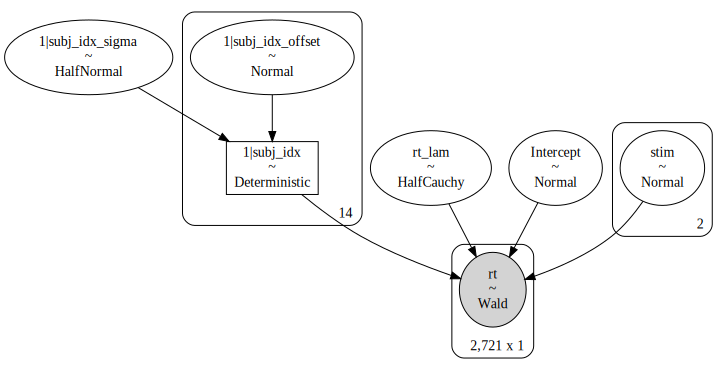

In [25]:
model1.graph()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe0a7bc21d0>,
      dtype=object)

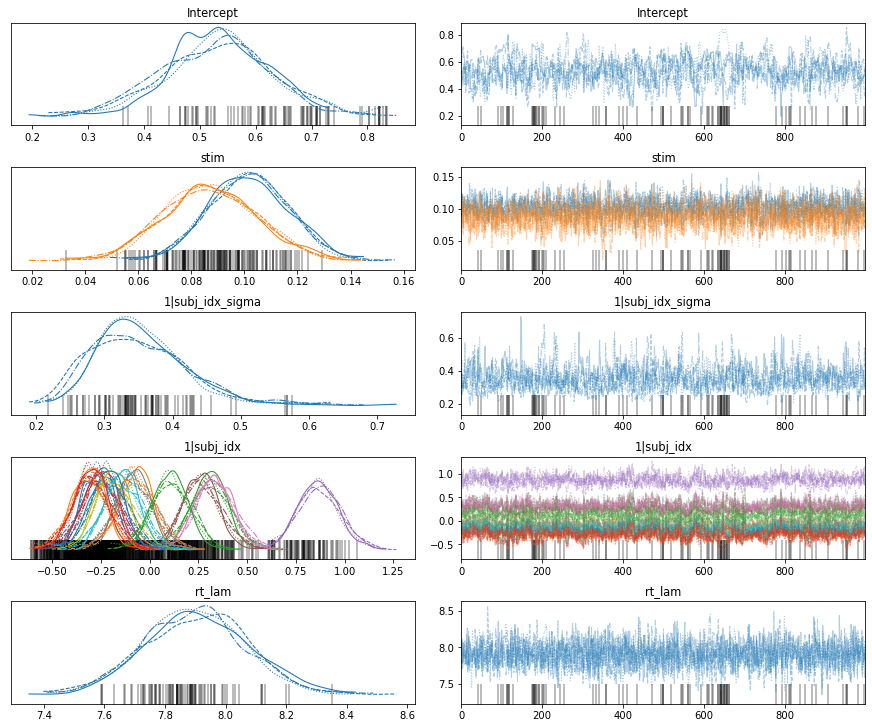

In [12]:
az.plot_trace(results)

In [14]:
az.loo(results)

Computed from 4000 by 3988 log-likelihood matrix

         Estimate       SE
elpd_loo -2916.40    51.55
p_loo       16.42        -

In [15]:
results

Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats
	> observed_data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe0a75e35d0>,
      dtype=object)

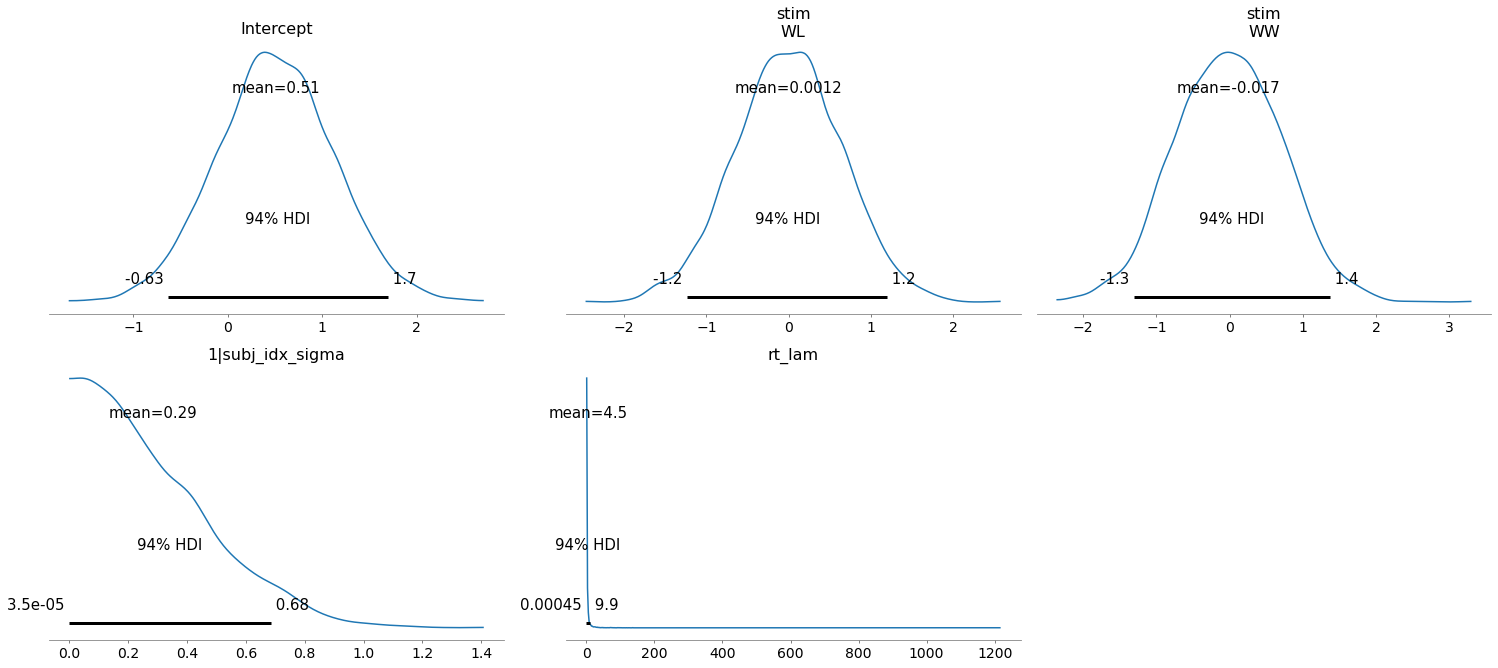

In [17]:
model.plot_priors()